In [72]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import pylab

In [2]:
# Imports the data 'csv' file

# Use this if there was no alarm event in the temp
df = pd.read_csv('B582127C.csv', skiprows=range(0,4), date_parser = pd.to_datetime)
# use this if there was an alarm event in temp readings
# df = pd.read_csv('B582127C.csv', skiprows=range(0,9), date_parser = pd.to_datetime)

In [3]:
# This code replaces Celsius to Fahrenheit in column 1. 
# If you need to change to any other column, then just change red 'P1' to new column name
def f(x):
    x = (x * 1.8) + 32
    return float(x)

df['P1'] = df['P1'].apply(f)

In [4]:
g = df.groupby(['Date'])

In [5]:
def avg(g, N=4):
    cum = np.cumsum(g,0)
    result = cum[N-1::N]/float(N)
    result[1:] = result[1:] - result[:-1]

    remainder = g.shape[0] % N
    if remainder != 0:
        if remainder < g.shape[0]:
            lastAvg = (cum[-1]-cum[-1-remainder])/float(remainder)
        else:
            lastAvg = cum[-1]/float(remainder)
        result = np.vstack([result, lastAvg])
    return result

In [14]:
df.groupby([df["Date"].dt.month, df["Time"].dt.hour]).mean()

AttributeError: Can only use .dt accessor with datetimelike values

In [6]:
new = g.get_group('12/17/18')
new

,P1,P2,Time,Date
0,71.672,0.0,10:00,12/17/18
1,71.636,0.0,09:45,12/17/18
2,71.690,0.0,09:30,12/17/18
3,71.582,0.0,09:15,12/17/18
4,71.492,0.0,09:00,12/17/18
5,71.384,0.0,08:45,12/17/18
6,71.240,0.0,08:30,12/17/18
7,71.132,0.0,08:15,12/17/18
8,70.952,0.0,08:00,12/17/18
9,70.646,0.0,07:45,12/17/18


In [7]:
from itertools import chain
n=4
New = list(chain.from_iterable([np.mean(new[i:i+n])]*n for i in range(0,len(new),n)))
New[0:5]

[P1    71.645
 P2     0.000
 dtype: float64, P1    71.645
 P2     0.000
 dtype: float64, P1    71.645
 P2     0.000
 dtype: float64, P1    71.645
 P2     0.000
 dtype: float64, P1    71.312
 P2     0.000
 dtype: float64]

In [8]:
x = New[0].values
# y = New['P1'].values
x

array([71.645,  0.   ])

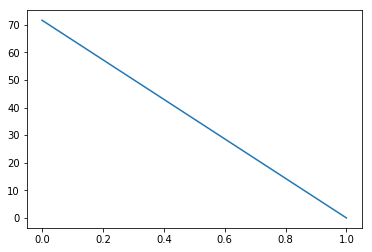

In [9]:
plt.plot(x)

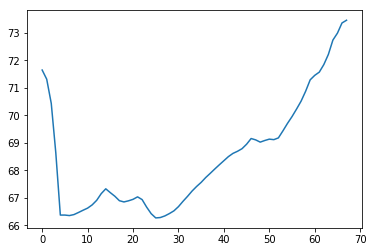

In [29]:
fd = df.groupby(np.arange(len(df))//4).mean()
y = fd['P1']
# day = fd['Date']
plt.plot(y)

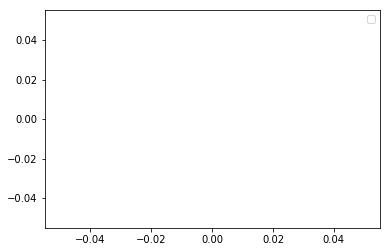

In [21]:
# Generate Data

groups = df.groupby('Date')

# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot()
ax.legend()

plt.show()

In [36]:
Temp = df['P1'].values
a = [x for x in Temp if float(x) <= 67]
# print a
print len(a)

93


In [55]:
for sample, data in df.groupby('Date'):
    print(sample) # access to sample name
    data['P1'].plot() # process sample records

12/14/18
12/15/18
12/16/18
12/17/18


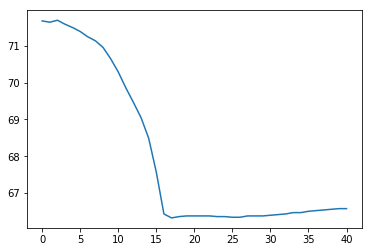

In [61]:
data['P1'].plot()

12/14/18
12/15/18
12/16/18
12/17/18


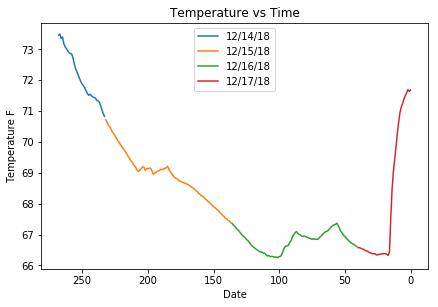

In [90]:
cnt = 0
for sample, data in df.groupby('Date'):
    print(sample) # access to sample name
    cnt = cnt+1
    data['P1'].plot() # process sample records
    ax = fig.add_subplot(5,5,cnt)
    ax.plot(df['Time'], df[['P1']])
    ax.set_title(sample)

plt.tight_layout()
plt.title('Temperature vs Time')
plt.xlabel('Date')
plt.ylabel('Temperature F')
L = pylab.legend(loc='upper center')
L.get_texts()[0].set_text('12/14/18')
L.get_texts()[1].set_text('12/15/18')
L.get_texts()[2].set_text('12/16/18')
L.get_texts()[3].set_text('12/17/18')
plt.gca().invert_xaxis()
plt.show()